In [1]:
df <- read.table("featuresextracted.csv", header= TRUE, stringsAsFactors = FALSE, sep=",")

In [2]:
head(df)

,activity,sex,meanx,meany,meanz,skewx,skewy,skewz,kurtx,kurty,kurtz,corxy,coryz,corxz,e1,e2,e3
1,standup_chair,1,-3.577941,3.19708,7.293908,-0.02743029,0.1256692,-0.1331527,1.116679,1.511332,1.18265,-0.9221761,-0.9025038,0.9702177,443.5277,266.0947,423.7009
2,sitdown_chair,1,-3.164217,4.258892,6.826107,-0.1194712,0.5794308,-0.1097923,1.106795,3.38443,1.248554,0.6679544,0.6425899,0.96022,472.6722,239.3231,372.4055
3,pour_water,1,0.7739084,0.8936094,8.676544,0.4834989,-0.2466208,0.5049835,2.338528,1.282156,3.489376,0.7461314,0.1828762,0.1979201,154.1541,264.91,217.2445
4,drink_glass,1,2.300959,3.311903,8.927909,0.4539398,-0.8603673,0.2220048,1.78886,2.139986,3.773488,-0.8746166,0.007853708,-0.06172179,114.9052,155.6867,143.5032
5,drink_glass,1,2.541931,3.663932,8.580743,0.2279045,-0.7378359,-1.342537,3.249835,2.044912,14.14306,-0.8632525,-0.2465573,0.2792758,174.865,211.0282,192.7282
6,standup_chair,1,-5.170489,5.108228,5.11284,0.9050761,0.9603296,0.6652821,1.96315,3.165712,1.744554,0.8518449,0.858185,0.956636,402.6098,216.1527,250.1744


### We'll include sex this time 

In [3]:
str(df)

'data.frame':	839 obs. of  17 variables:
 $ activity: chr  "standup_chair" "sitdown_chair" "pour_water" "drink_glass" ...
 $ sex     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ meanx   : num  -3.578 -3.164 0.774 2.301 2.542 ...
 $ meany   : num  3.197 4.259 0.894 3.312 3.664 ...
 $ meanz   : num  7.29 6.83 8.68 8.93 8.58 ...
 $ skewx   : num  -0.0274 -0.1195 0.4835 0.4539 0.2279 ...
 $ skewy   : num  0.126 0.579 -0.247 -0.86 -0.738 ...
 $ skewz   : num  -0.133 -0.11 0.505 0.222 -1.343 ...
 $ kurtx   : num  1.12 1.11 2.34 1.79 3.25 ...
 $ kurty   : num  1.51 3.38 1.28 2.14 2.04 ...
 $ kurtz   : num  1.18 1.25 3.49 3.77 14.14 ...
 $ corxy   : num  -0.922 0.668 0.746 -0.875 -0.863 ...
 $ coryz   : num  -0.9025 0.64259 0.18288 0.00785 -0.24656 ...
 $ corxz   : num  0.9702 0.9602 0.1979 -0.0617 0.2793 ...
 $ e1      : num  444 473 154 115 175 ...
 $ e2      : num  266 239 265 156 211 ...
 $ e3      : num  424 372 217 144 193 ...


In [4]:
df$activity[df$activity=="liedown_bed"] <- "bed_liedown_getup"
df$activity[df$activity=="getup_bed"] <- "bed_liedown_getup"
df$activity[df$activity=="eat_meat"] <- "eat"
df$activity[df$activity=="eat_soup"] <- "eat"
df$activity[df$activity=="standup_chair"] <- "chair_standup_sitdown"
df$activity[df$activity=="sitdown_chair"] <- "chair_standup_sitdown"
df$activity[df$activity=="climb_stairs"] <- "stairs_climb_descend"
df$activity[df$activity=="descend_stairs"] <- "stairs_climb_descend"

In [5]:
df$activity <- as.factor(df$activity)

In [6]:
require(caret)

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


### Reduced to 10 levels. Included sex

In [7]:
str(df)

'data.frame':	839 obs. of  17 variables:
 $ activity: Factor w/ 10 levels "bed_liedown_getup",..: 3 3 7 5 5 3 3 7 5 7 ...
 $ sex     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ meanx   : num  -3.578 -3.164 0.774 2.301 2.542 ...
 $ meany   : num  3.197 4.259 0.894 3.312 3.664 ...
 $ meanz   : num  7.29 6.83 8.68 8.93 8.58 ...
 $ skewx   : num  -0.0274 -0.1195 0.4835 0.4539 0.2279 ...
 $ skewy   : num  0.126 0.579 -0.247 -0.86 -0.738 ...
 $ skewz   : num  -0.133 -0.11 0.505 0.222 -1.343 ...
 $ kurtx   : num  1.12 1.11 2.34 1.79 3.25 ...
 $ kurty   : num  1.51 3.38 1.28 2.14 2.04 ...
 $ kurtz   : num  1.18 1.25 3.49 3.77 14.14 ...
 $ corxy   : num  -0.922 0.668 0.746 -0.875 -0.863 ...
 $ coryz   : num  -0.9025 0.64259 0.18288 0.00785 -0.24656 ...
 $ corxz   : num  0.9702 0.9602 0.1979 -0.0617 0.2793 ...
 $ e1      : num  444 473 154 115 175 ...
 $ e2      : num  266 239 265 156 211 ...
 $ e3      : num  424 372 217 144 193 ...


## Let's cross-validate this time

In [8]:
set.seed(998)

In [9]:
inTraining <- createDataPartition(df$activity, p = .75, list = FALSE)

In [10]:
training <- df[inTraining,]
testing  <- df[-inTraining,]

In [11]:
str(training)

'data.frame':	631 obs. of  17 variables:
 $ activity: Factor w/ 10 levels "bed_liedown_getup",..: 3 3 7 5 5 3 7 7 3 5 ...
 $ sex     : int  1 1 1 1 1 1 1 0 0 0 ...
 $ meanx   : num  -3.578 -3.164 0.774 2.301 2.542 ...
 $ meany   : num  3.197 4.259 0.894 3.312 3.664 ...
 $ meanz   : num  7.29 6.83 8.68 8.93 8.58 ...
 $ skewx   : num  -0.0274 -0.1195 0.4835 0.4539 0.2279 ...
 $ skewy   : num  0.126 0.579 -0.247 -0.86 -0.738 ...
 $ skewz   : num  -0.133 -0.11 0.505 0.222 -1.343 ...
 $ kurtx   : num  1.12 1.11 2.34 1.79 3.25 ...
 $ kurty   : num  1.51 3.38 1.28 2.14 2.04 ...
 $ kurtz   : num  1.18 1.25 3.49 3.77 14.14 ...
 $ corxy   : num  -0.922 0.668 0.746 -0.875 -0.863 ...
 $ coryz   : num  -0.9025 0.64259 0.18288 0.00785 -0.24656 ...
 $ corxz   : num  0.9702 0.9602 0.1979 -0.0617 0.2793 ...
 $ e1      : num  444 473 154 115 175 ...
 $ e2      : num  266 239 265 156 211 ...
 $ e3      : num  424 372 217 144 193 ...


In [12]:
fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           ## repeated ten times
                           repeats = 10)

## Boosting

In [13]:
set.seed(825)
gbmFit1 <- train(activity ~ ., data = training,
                 method = "gbm",
                 trControl = fitControl,
                 ## This last option is actually one
                 ## for gbm() that passes through
                 verbose = FALSE)

Loading required package: gbm
Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.1
Loading required package: plyr


In [36]:
gbmpredict <- predict(gbmFit1, testing)

In [37]:
gbmconfusion <- confusionMatrix(gbmpredict, testing$activity)

In [38]:
gbmconfusion$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  8.990385e-01   8.802632e-01   8.498149e-01   9.364098e-01   2.403846e-01 
AccuracyPValue  McnemarPValue 
  1.798753e-90            NaN

In [39]:
dfconfusion <- as.data.frame(gbmconfusion$table)
dim(dfconfusion)

[1] 100   3

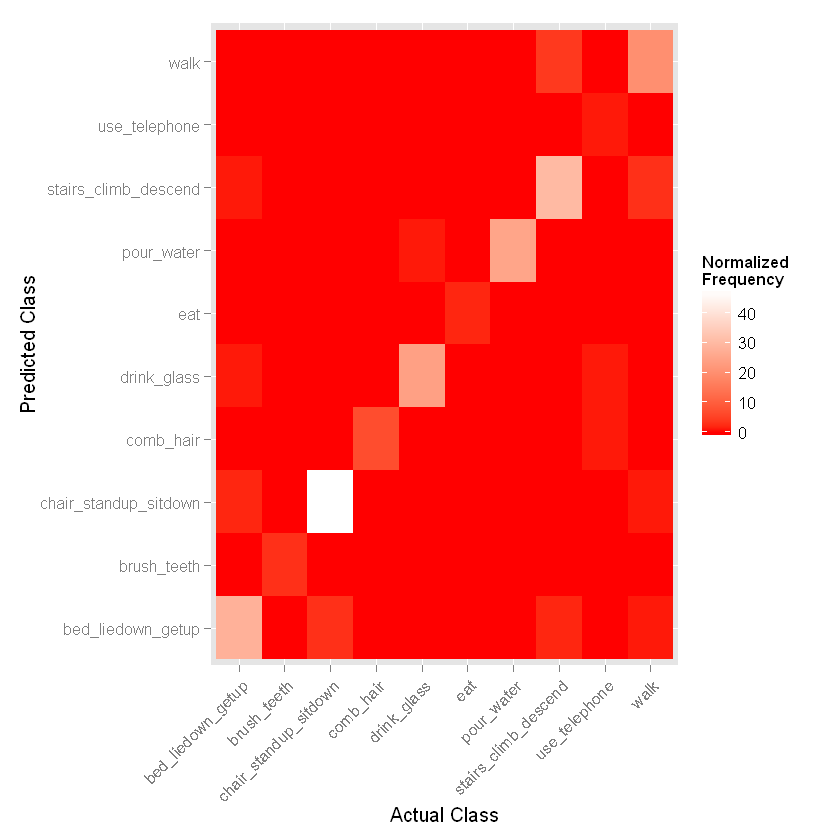

In [40]:
plot <- ggplot(dfconfusion)
plot + geom_tile(aes(x=Reference, y=Prediction, fill=Freq)) + scale_x_discrete(name="Actual Class") + scale_y_discrete(name="Predicted Class") + scale_fill_gradient(low="red",high="white")+
 theme(axis.text.x = element_text(angle = 45, hjust = 1))+ labs(fill="Normalized\nFrequency")

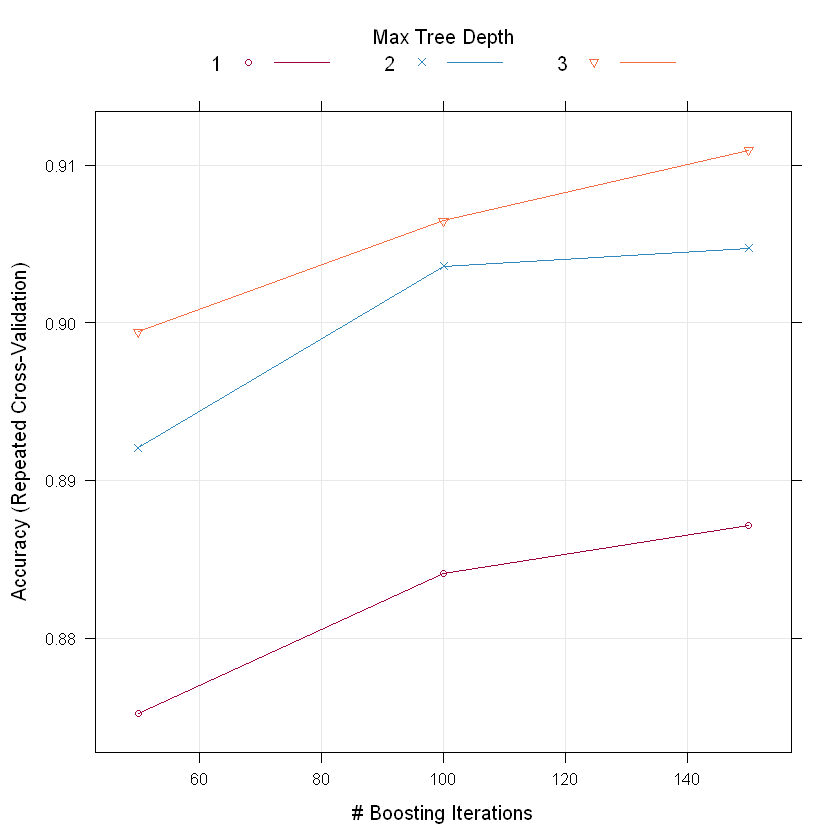

In [42]:
plot(gbmFit1)

## Close to 90% accuracy on the testing set

## Random forests

In [19]:
set.seed(825)
rfFit1 <- train(activity ~ ., data = training,
                 method = "rf",
                 trControl = fitControl)
# oops didn't change the name

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [21]:
rfpredict <- predict(rfFit1, testing)

In [22]:
rfconfusion <- confusionMatrix(rfpredict, testing$activity)

In [23]:
rfconfusion$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  9.375000e-01   9.258853e-01   8.954943e-01   9.663049e-01   2.403846e-01 
AccuracyPValue  McnemarPValue 
 8.091598e-103            NaN

In [24]:
rfdfconfusion <- as.data.frame(rfconfusion$table)
dim(dfconfusion)

ERROR: Error in eval(expr, envir, enclos): object 'dfconfusion' not found


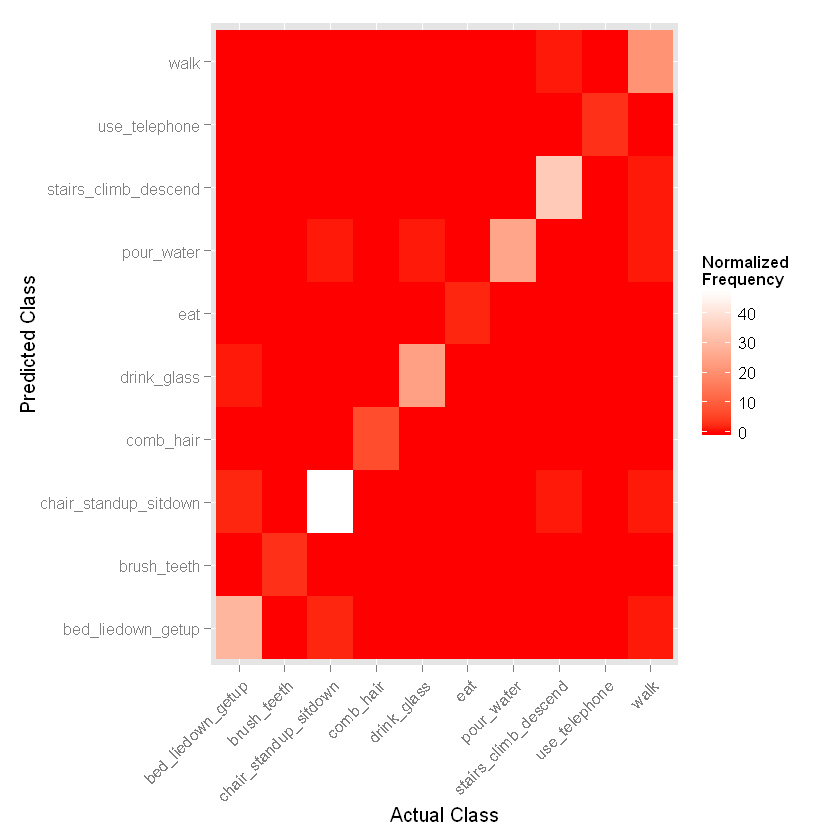

In [25]:
plot <- ggplot(rfdfconfusion)
plot + geom_tile(aes(x=Reference, y=Prediction, fill=Freq)) + scale_x_discrete(name="Actual Class") + scale_y_discrete(name="Predicted Class") + scale_fill_gradient(low="red",high="white")+
 theme(axis.text.x = element_text(angle = 45, hjust = 1))+ labs(fill="Normalized\nFrequency")

In [26]:
trellis.par.set(caretTheme())

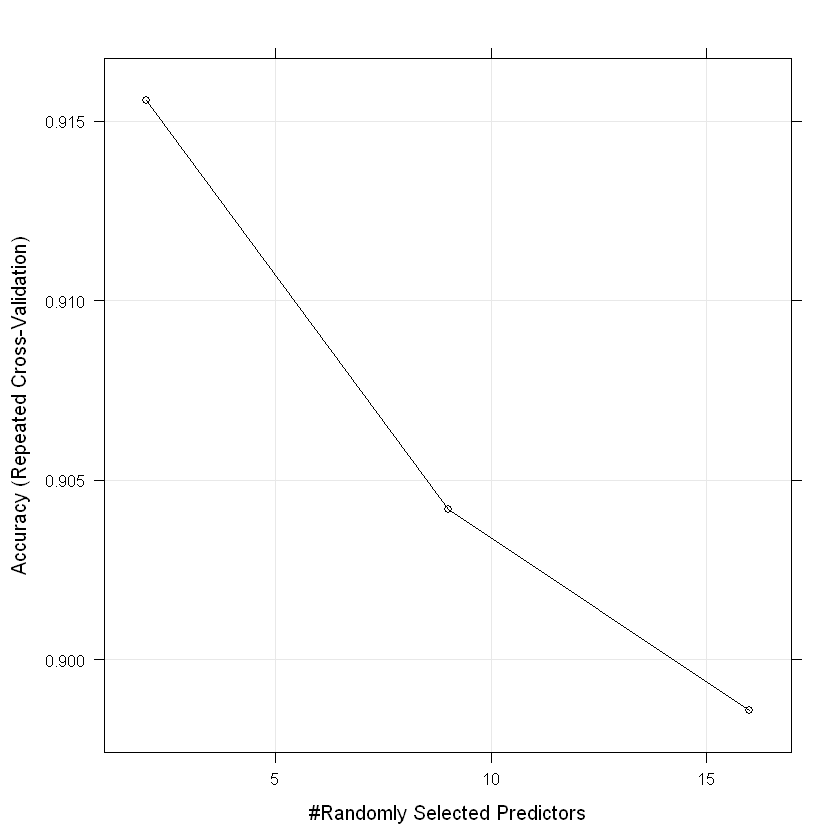

In [35]:
plot(rfFit1)


In [28]:
rfconfusion$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  9.375000e-01   9.258853e-01   8.954943e-01   9.663049e-01   2.403846e-01 
AccuracyPValue  McnemarPValue 
 8.091598e-103            NaN

## 93.75 accuracy on the testing set!

# TO DO: More models!

In [29]:
varImp(gbmFit1)

gbm variable importance

      Overall
corxy 100.000
e2     99.876
corxz  90.873
meanx  88.296
meanz  51.908
e3     47.086
e1     30.772
meany  23.587
kurtz  19.657
kurtx  11.704
skewz   5.199
coryz   4.114
skewx   3.048
skewy   2.364
kurty   1.568
sex     0.000

## Sex is not a prominent feature!